<a href="https://colab.research.google.com/github/EduGouveia/DataSet_DeepLearning_DIO/blob/main/ClassificacaoImagemWill_Tom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Classificação de imagens de Will Smith vs Tom Cruise sem aumento de imagem

/root/.keras/datasets
/root/.keras/datasets/WillvsTom
/root/.keras/datasets/WillvsTom/train
/root/.keras/datasets/WillvsTom/train/TomCruise
/root/.keras/datasets/WillvsTom/train/WillSmith
/root/.keras/datasets/WillvsTom/validation
/root/.keras/datasets/WillvsTom/validation/TomCruise
/root/.keras/datasets/WillvsTom/validation/WillSmith
total training tom images: 92
total training will images: 86
total validation tom images: 24
total validation will images: 46
--
Total training images: 178
Total validation images: 70
Found 178 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


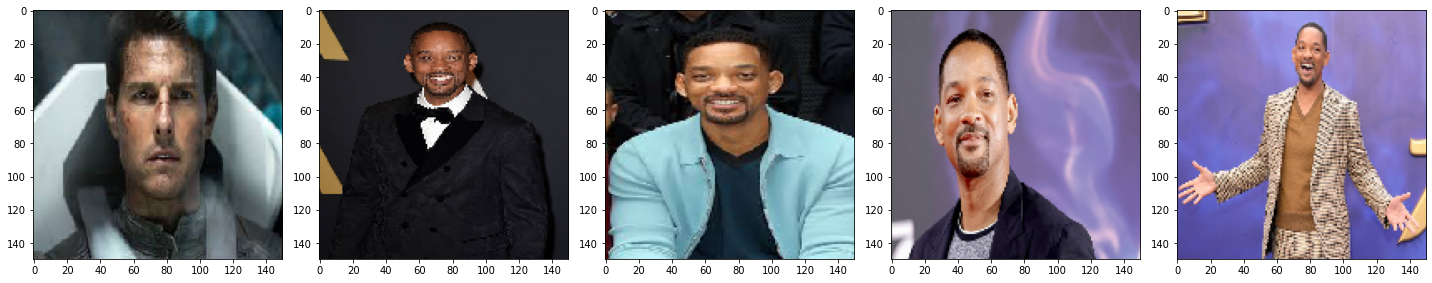

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 17, 17, 64)     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 0.9751 - accuracy: 0.4775 - val_loss: 0.7092 - val_accuracy: 0.3857
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 0.6985 - accuracy: 0.5393 - val_loss: 0.7485 - val_accuracy: 0.3429
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 0.6901 - accuracy: 0.5169 - val_loss: 0.6837 - val_accuracy: 0.6571
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 0.6863 - accuracy: 0.5506 - val_loss: 0.6868 - val_accuracy: 0.6571
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 0.6772 - accuracy: 0.7528 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 0.6655 - accuracy: 0.6573 - val_loss: 0.6912 - val_accuracy: 0.5143
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 0.6397 - accuracy: 0.7360 - val_loss: 0.6757 - val_accuracy: 0.5571
Epoch 8/100
2/2 [=================

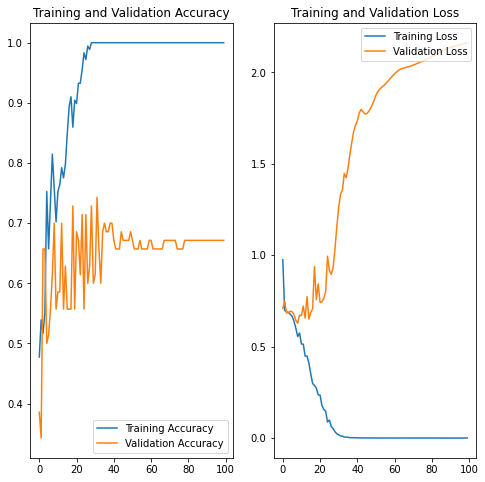

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)


#Carregando dados
#_URL = 'https://drive.google.com/drive/folders/1AemjbdqZPKl9Di2jSXS-9BVzkQocLjfc'
_URL = 'https://github.com/EduGouveia/DataSet_DeepLearning_DIO/raw/main/WillvsTom.zip'
zip_dir = tf.keras.utils.get_file('WillvsTom.zip', origin=_URL, extract=True)

#listar os diretórios
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

#atribuir variáveis com o caminho e treinamento e validação.

base_dir = os.path.join(os.path.dirname(zip_dir), 'WillvsTom')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_TomCruise_dir = os.path.join(train_dir, 'TomCruise')  # directory with our training tom pictures
train_WillSmith_dir = os.path.join(train_dir, 'WillSmith')  # directory with our training will pictures
validation_TomCruise_dir = os.path.join(validation_dir, 'TomCruise')  # directory with our validation tom pictures
validation_WillSmith_dir = os.path.join(validation_dir, 'WillSmith')  # directory with our validation will pictures



#quantidade de imagens por pasta treinamento e validação
num_TomCruise_tr = len(os.listdir(train_TomCruise_dir))
num_WillSmith_tr = len(os.listdir(train_WillSmith_dir))
#num_jim_carrey_tr = len(os.listdir(train_jim_carrey_dir))
#num_will_smith_tr = len(os.listdir(train_will_smith_dir))

num_TomCruise_val = len(os.listdir(validation_TomCruise_dir))
num_WillSmith_val = len(os.listdir(validation_WillSmith_dir))

total_train = num_TomCruise_tr + num_WillSmith_tr
total_val = num_TomCruise_val + num_WillSmith_val


print('total training tom images:', num_TomCruise_tr)
print('total training will images:', num_WillSmith_tr)

print('total validation tom images:', num_TomCruise_val)
print('total validation will images:', num_WillSmith_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)



# Configurando os parâmetros do modelo
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels


#Preparação de dados usando a classe tf.keras.preprocessing.image.ImageDataGenerator.
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data


#redimensionamento
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')


# Visualizing Training images

sample_training_images, _ = next(train_data_gen) 




# batch from the dataset.
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])  # Plot images 0-4



# Criação de modelos

#blocos de convolução com uma camada de pool máximo

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.AvgPool2D(2,2),
    #tf.keras.layers.Dropout(0,5),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0,5),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0,5),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0,5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
]) 

#Analise da acuracia(precisão) curva ROC

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Resumo do modelo SUMARIO
model.summary()


# treinamemnto da rede em lotes vêm de um gerador (`ImageDataGenerator`)

EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)




#resultados do treinamento(verificação se há overfitting)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

